In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf = pd.read_csv('Titanic_train.csv')
testdf = pd.read_csv('Titanic_test.csv')

In [3]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
traindf.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
testdf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
traindf.duplicated().sum()

0

In [9]:
testdf.duplicated().sum()

0

In [10]:
traindf.drop('Name', axis = 1, inplace= True)

In [11]:
testdf.drop('Name', axis = 1, inplace= True)

In [12]:
# Cabin column has too many missing values. so we will drop this column. also ticket number , PassengerId is not required.

In [13]:
traindf.drop(['Cabin','PassengerId','Ticket'], axis = 1, inplace = True)

In [14]:
testdf.drop(['Cabin','PassengerId','Ticket'], axis = 1, inplace = True)

In [15]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
testdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [17]:
traindf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Figure size 3000x2000 with 0 Axes>

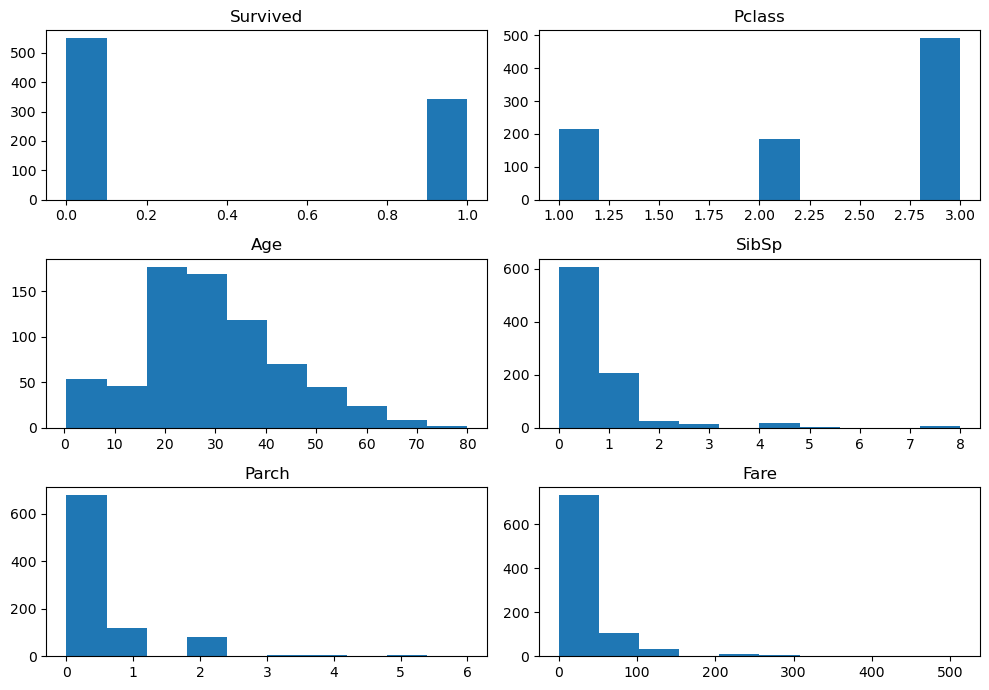

In [18]:
plt.figure(figsize = (30,20))
traindf.hist(figsize = (10,7), grid = False)
plt.tight_layout()
plt.show()

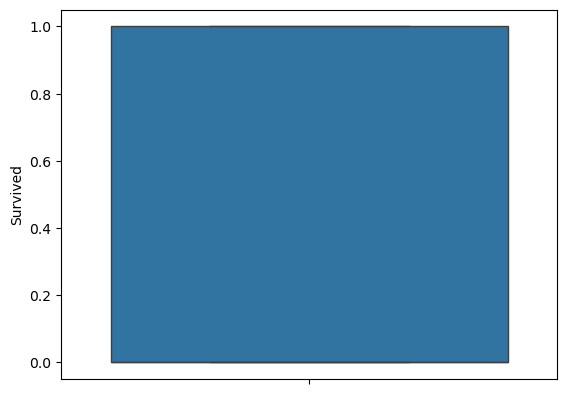

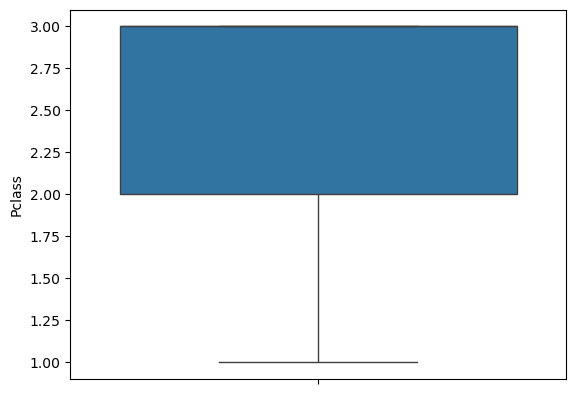

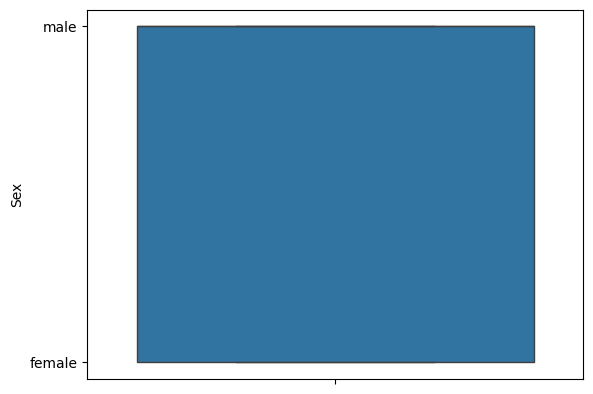

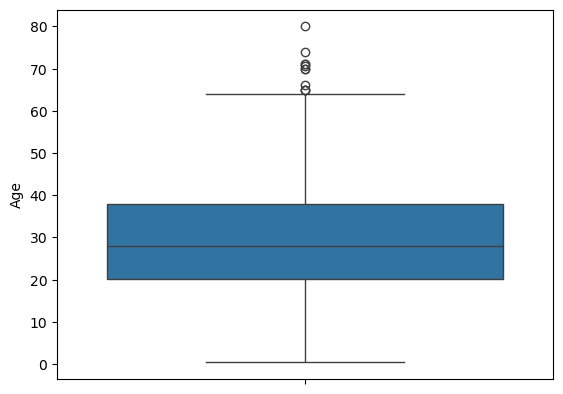

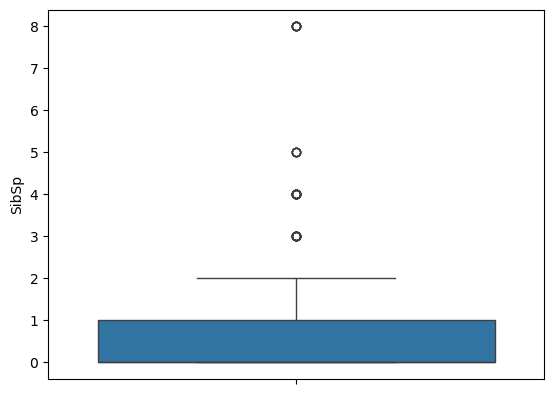

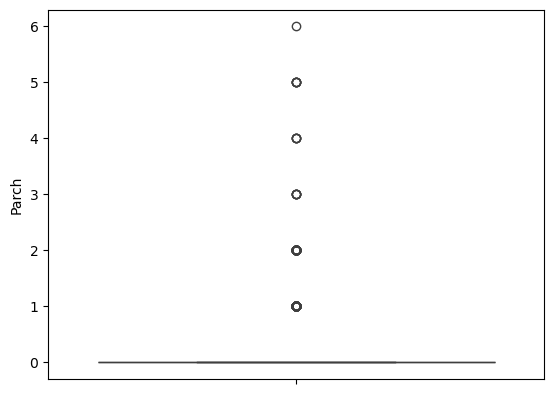

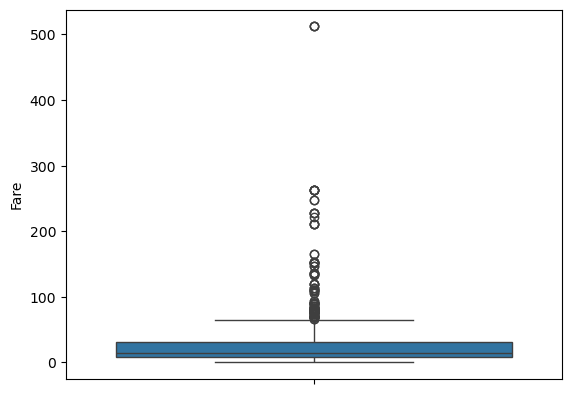

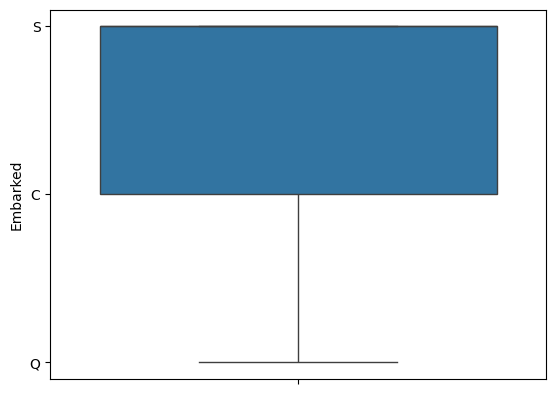

In [19]:
for column in traindf.columns:
    sns.boxplot(traindf[column])
    plt.show()

In [20]:
# handling missing values in Age column
traindf['Age'] = traindf['Age'].fillna(traindf['Age'].median())

In [21]:
# handling missing values in Age column
testdf['Age'] = traindf['Age'].fillna(traindf['Age'].median())

In [22]:
traindf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [23]:
# handling missing values in Embarked column.
traindf['Embarked'] = traindf['Embarked'].fillna(traindf['Embarked'].mode()[0])

In [24]:
testdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [25]:
testdf['Fare'] = testdf['Fare'].fillna(testdf['Fare'].mode()[0])

In [26]:
testdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
traindf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
traindf['Age'] = traindf['Age'].astype(int)
testdf['Age'] = testdf['Age'].astype(int)

In [29]:
print(testdf.info())


print(traindf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    int32  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 21.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarke

In [30]:
traindf.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S


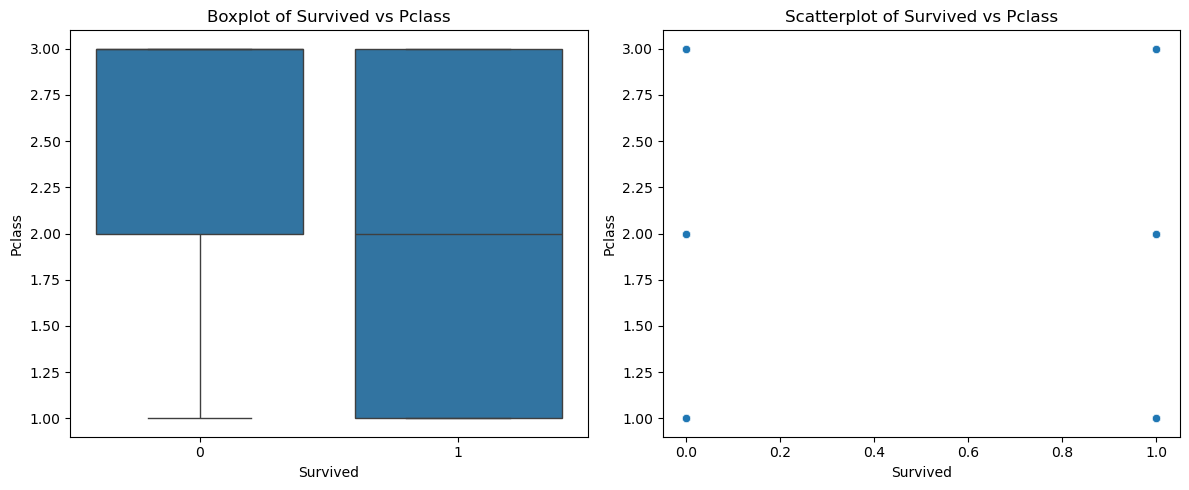

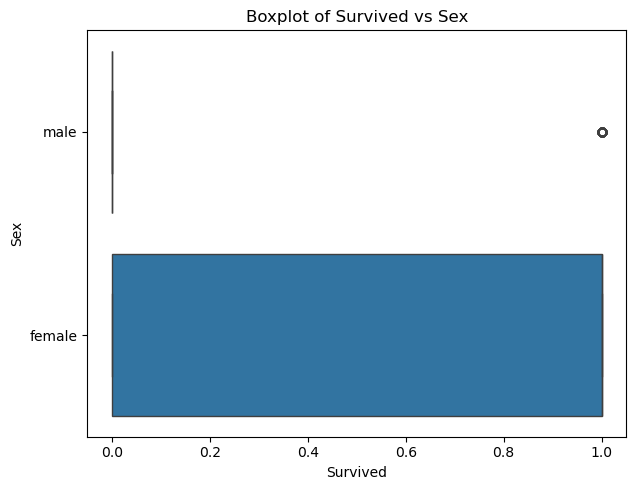

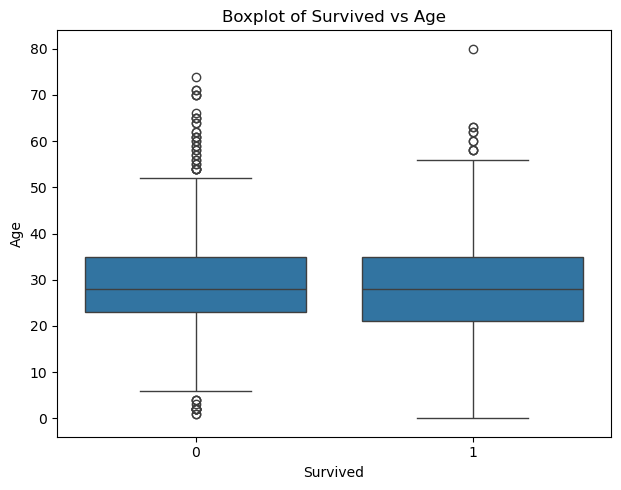

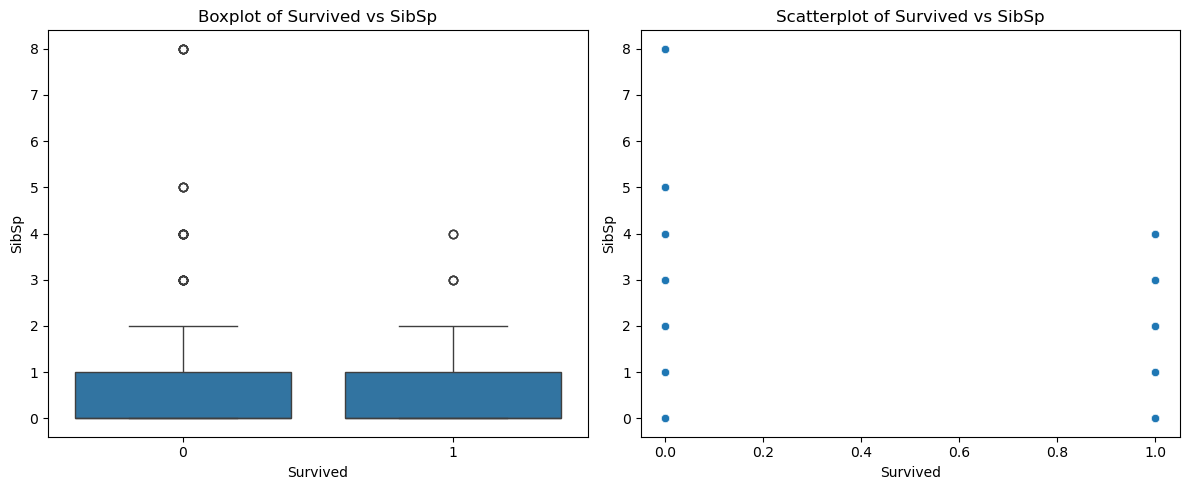

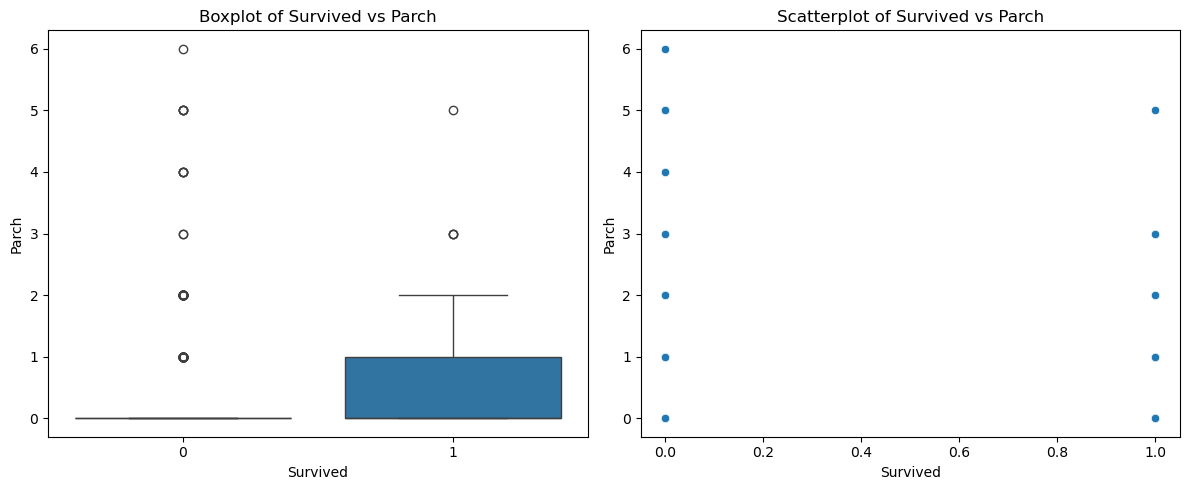

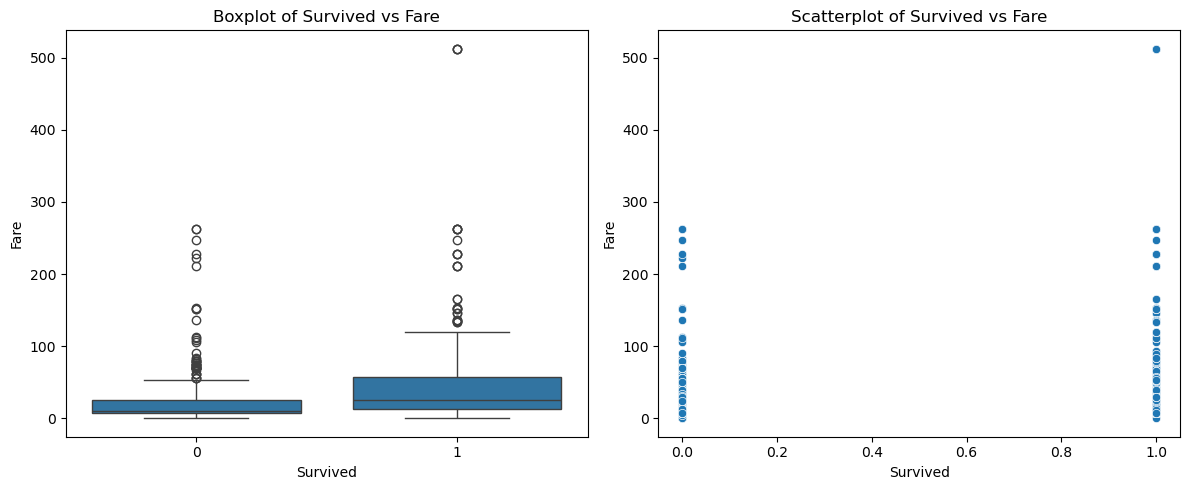

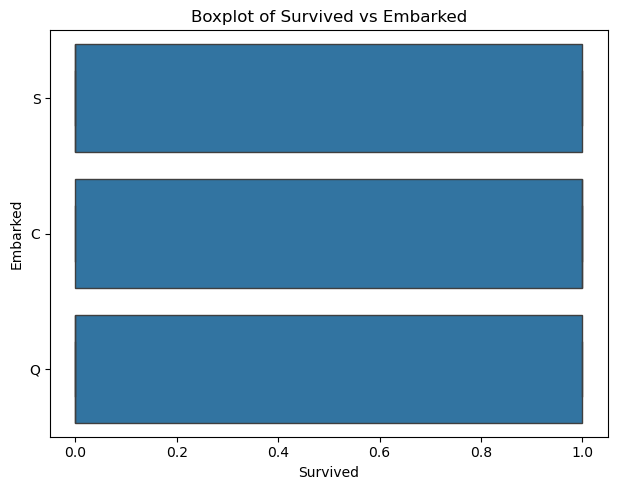

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot against 'Survived'
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Loop through each column and generate boxplot and scatterplot
for col in columns:
    plt.figure(figsize=(12, 5))
    
    # Boxplot
    plt.subplot(1, 2, 1)  # First plot in a 1x2 grid
    sns.boxplot(x='Survived', y=col, data=traindf)
    plt.title(f'Boxplot of Survived vs {col}')
    plt.xlabel('Survived')
    plt.ylabel(col)
    
    # Scatterplot (only for numeric columns)
    if traindf[col].dtype in ['float64', 'int64']:  # Only plot scatterplot for numeric columns
        plt.subplot(1, 2, 2)  # Second plot in a 1x2 grid
        sns.scatterplot(x='Survived', y=col, data=traindf)
        plt.title(f'Scatterplot of Survived vs {col}')
        plt.xlabel('Survived')
        plt.ylabel(col)

    # Show the plots
    plt.tight_layout()
    plt.show()


#### The data is free from missing values and unwanted columns 

In [33]:
#Converting categorical columns to numerical columns.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
traindf['Sex'] = le.fit_transform(traindf['Sex'])

In [34]:
traindf['Embarked']= le.fit_transform(traindf['Embarked'])
testdf['Sex'] = le.fit_transform(testdf['Sex'])
testdf['Embarked'] = le.fit_transform(testdf['Embarked'])

In [35]:
traindf.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0


In [36]:
testdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,0,0,7.8292,1
1,3,0,38,1,0,7.0000,2


In [37]:
traindf.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064909,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339999,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.080750,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064909,-0.339999,0.080750,1.000000,-0.233066,-0.172745,0.096838,-0.018222
SibSp,-0.035322,0.083081,-0.114631,-0.233066,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172745,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096838,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018222,0.068230,0.039798,-0.224719,1.000000


In [38]:
# split the data into training and testing 
from sklearn.model_selection import train_test_split


X = traindf.drop('Survived', axis=1)
y = traindf['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
pip install lightgbm xgboost


Note: you may need to restart the kernel to use updated packages.


In [40]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
# Predict with LightGBM
lgb_predictions = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_precision = precision_score(y_test, lgb_predictions)
lgb_recall = recall_score(y_test, lgb_predictions)
lgb_f1 = f1_score(y_test, lgb_predictions)

print(f"LightGBM - Accuracy: {lgb_accuracy:.4f}, Precision: {lgb_precision:.4f}, Recall: {lgb_recall:.4f}, F1-score: {lgb_f1:.4f}")

# Predict with XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1-score: {xgb_f1:.4f}")


LightGBM - Accuracy: 0.8212, Precision: 0.7838, Recall: 0.7838, F1-score: 0.7838
XGBoost - Accuracy: 0.7765, Precision: 0.7237, Recall: 0.7432, F1-score: 0.7333


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:

# Cross-validation for LightGBM
lgb_cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='f1')
print(f"LightGBM Cross-Validation F1-scores: {lgb_cv_scores}")
print(f"LightGBM Mean F1-score: {lgb_cv_scores.mean():.4f}")

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1')
print(f"XGBoost Cross-Validation F1-scores: {xgb_cv_scores}")
print(f"XGBoost Mean F1-score: {xgb_cv_scores.mean():.4f}")


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [44]:
print(f"LightGBM Cross-Validation F1-scores: {lgb_cv_scores}")
print(f"LightGBM Mean F1-score: {lgb_cv_scores.mean():.4f}")


xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1')
print(f"XGBoost Cross-Validation F1-scores: {xgb_cv_scores}")
print(f"XGBoost Mean F1-score: {xgb_cv_scores.mean():.4f}")

LightGBM Cross-Validation F1-scores: [0.75362319 0.7480916  0.80916031 0.72440945 0.82608696]
LightGBM Mean F1-score: 0.7723
XGBoost Cross-Validation F1-scores: [0.74074074 0.75968992 0.82089552 0.69767442 0.8115942 ]
XGBoost Mean F1-score: 0.7661


In [45]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 127],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [20, 40]
}
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(), lgb_param_grid, cv=3, scoring='f1')
lgb_grid_search.fit(X_train, y_train)
print(f"Best parameters for LightGBM: {lgb_grid_search.best_params_}")
print(f"Best score for LightGBM: {lgb_grid_search.best_score_:.4f}")

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), xgb_param_grid, cv=3, scoring='f1')
xgb_grid_search.fit(X_train, y_train)
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best score for XGBoost: {xgb_grid_search.best_score_:.4f}")


[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [46]:
print(f"Best parameters for LightGBM: {lgb_grid_search.best_params_}")
print(f"Best score for LightGBM: {lgb_grid_search.best_score_:.4f}")

print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best score for XGBoost: {xgb_grid_search.best_score_:.4f}")

Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 40, 'num_leaves': 31}
Best score for LightGBM: 0.7255
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best score for XGBoost: 0.7469


In [47]:
import pandas as pd

# Create a DataFrame to compare the metrics
metrics = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_accuracy, xgb_accuracy],
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1-score': [lgb_f1, xgb_f1]
})

print(metrics)


      Model  Accuracy  Precision    Recall  F1-score
0  LightGBM  0.821229   0.783784  0.783784  0.783784
1   XGBoost  0.776536   0.723684  0.743243  0.733333


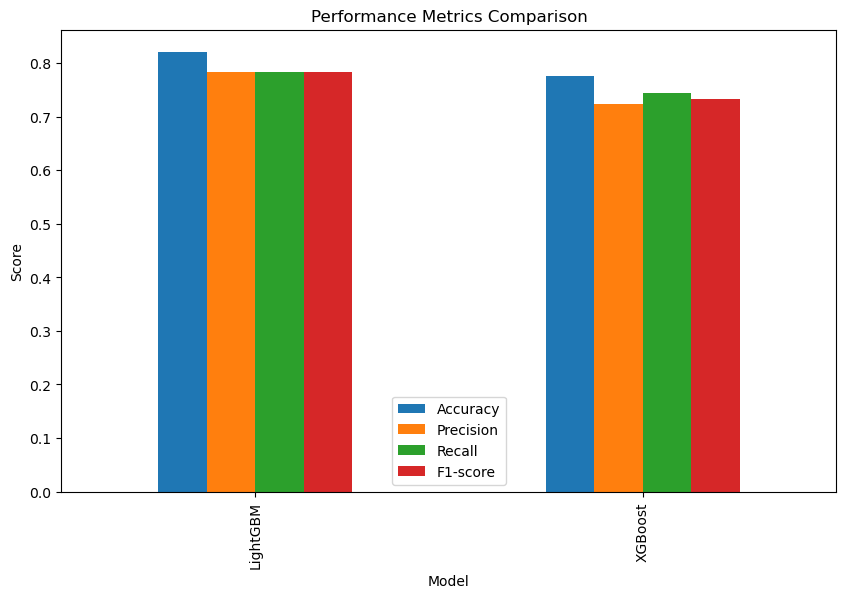

In [48]:
import matplotlib.pyplot as plt

# Plot the metrics for comparison
metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.show()


### Visualize the Results

#### Visualizing the results helps to interpret the strengths and weaknesses of each algorithm. The bar plot above will give you a clear visual comparison.

### Interpretation the Results

* Accuracy: Shows the overall correctness of the model. However, it might not be sufficient if you have imbalanced classes.
* Precision and Recall: Useful for understanding how well the models are performing with respect to positive predictions. High precision means fewer false positives, while high recall means fewer false negatives.
* F1-score: Provides a balance between precision and recall, especially useful if you need a single metric to evaluate model performance.

## Comparative Analysis Report

##### Introduction: 
* This report evaluates and compares the performance of two machine learning models, LightGBM and XGBoost, on the Titanic dataset. The goal of the analysis is to determine which model performs better in predicting passenger survival using accuracy, precision, recall, and F1-score as evaluation metrics.

##### Performance Metrics:


#### LightGBM	
##### Accuracy = 0.8212, Precision = 0.7838, Recall = 0.7838, F1-score = 0.7838

#### XGBoost	
##### Accuracy = 0.7765, Precision = 0.7237, Recall = 0.7432, F1-score = 0.7333

* Accuracy: Measures the overall correctness of predictions, i.e., the proportion of true results among the total predictions.
* Precision: Reflects how many of the predicted positive cases (survivals) were actually positive.
* Recall: Indicates how many actual positive cases were correctly identified by the model.
* F1-score: A weighted average of precision and recall, providing a balance between both metrics.
##### Comparative Insights:

##### Accuracy Comparison:

* LightGBM achieved a higher accuracy of 0.8212 compared to XGBoost's accuracy of 0.7765. This indicates that LightGBM correctly classified a higher proportion of passengers.
##### Precision Comparison:

* LightGBM also outperformed XGBoost in terms of precision, with a value of 0.7838 vs. XGBoost’s 0.7237. This suggests that LightGBM is better at minimizing false positives (incorrectly predicting survival).
##### Recall Comparison:

* LightGBM achieved a recall of 0.7838, slightly higher than XGBoost's recall of 0.7432. This implies that LightGBM was slightly more effective in identifying true positives (survivals).
F1-score Comparison:

* LightGBM’s F1-score of 0.7838 is higher than XGBoost’s 0.7333, showing that LightGBM strikes a better balance between precision and recall.
##### Practical Implications:

* LightGBM is the overall better-performing model based on all evaluation metrics (accuracy, precision, recall, F1-score). It is especially suitable if * both precision and recall are important, such as in scenarios where both false positives and false negatives have significant costs.

* XGBoost, while slightly less effective in this case, could still be useful in scenarios where a higher recall is needed with lower computational cost, as XGBoost is known for its efficiency in large datasets and complex models.

* In conclusion, LightGBM is the recommended model for this analysis due to its superior performance across all metrics, particularly in balancing precision and recall.